<a href="https://colab.research.google.com/github/gtejaswi13/Bayes_labs_AI_assignment1/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset (make sure 'file_path' points to your uploaded file)
file_path = '/content/winequality.csv'  # Update if necessary
wine_data = pd.read_csv(file_path)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
wine_data.iloc[:, 1:] = imputer.fit_transform(wine_data.iloc[:, 1:])

# Encode the 'type' column (white/red) as numerical
label_encoder = LabelEncoder()
wine_data['type'] = label_encoder.fit_transform(wine_data['type'])

# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Adjust the target variable to start from 0 for XGBoost
y = y - y.min()  # This will make the classes start from 0

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better convergence in Logistic Regression and SVC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize models
log_reg = LogisticRegression(max_iter=2000, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svc = SVC(random_state=42)

# Helper function to train, predict, and calculate accuracy
def train_and_evaluate(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    return train_accuracy, val_accuracy

# Train and evaluate each model
log_reg_train_acc, log_reg_val_acc = train_and_evaluate(log_reg, X_train, X_val, y_train, y_val)
xgb_train_acc, xgb_val_acc = train_and_evaluate(xgb_clf, X_train, X_val, y_train, y_val)
svc_train_acc, svc_val_acc = train_and_evaluate(svc, X_train, X_val, y_train, y_val)

# Print the results
print("LogisticRegression() :")
print("Training Accuracy : ", log_reg_train_acc)
print("Validation Accuracy : ", log_reg_val_acc)

print("\nXGBClassifier() :")
print("Training Accuracy : ", xgb_train_acc)
print("Validation Accuracy : ", xgb_val_acc)

print("\nSVC() :")
print("Training Accuracy : ", svc_train_acc)
print("Validation Accuracy : ", svc_val_acc)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:15:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LogisticRegression() :
Training Accuracy :  0.545699441985761
Validation Accuracy :  0.5353846153846153

XGBClassifier() :
Training Accuracy :  0.9855685972676544
Validation Accuracy :  0.6784615384615384

SVC() :
Training Accuracy :  0.604771983836829
Validation Accuracy :  0.58


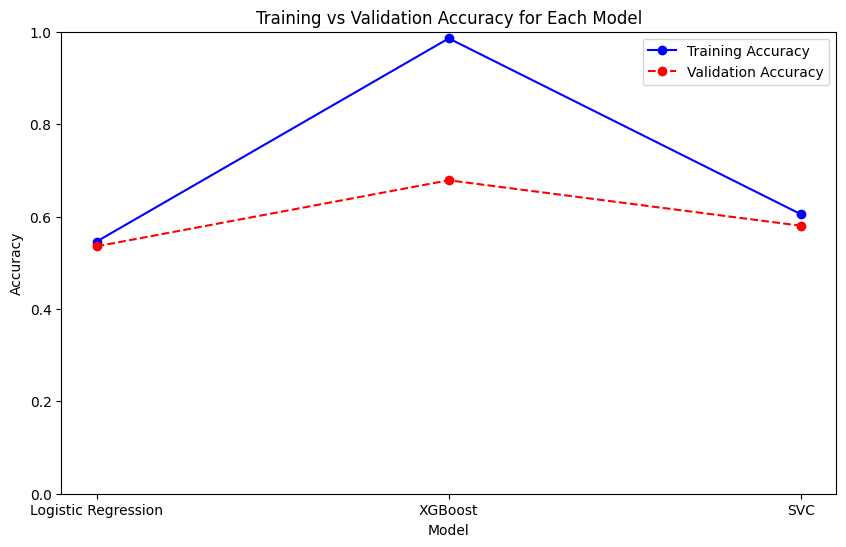

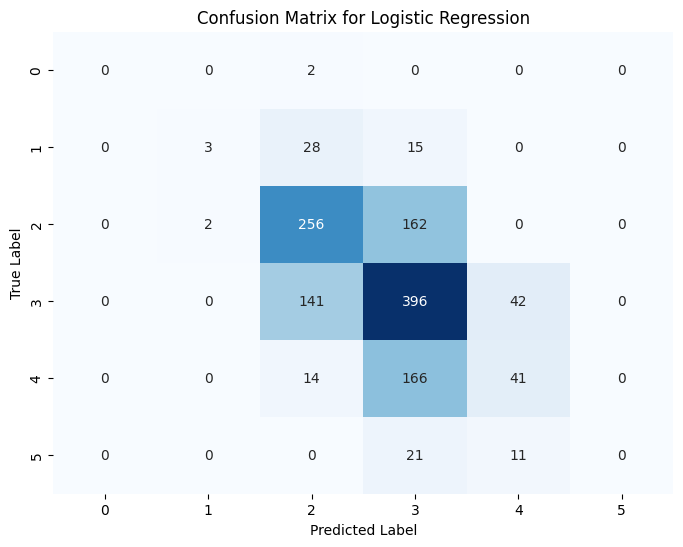

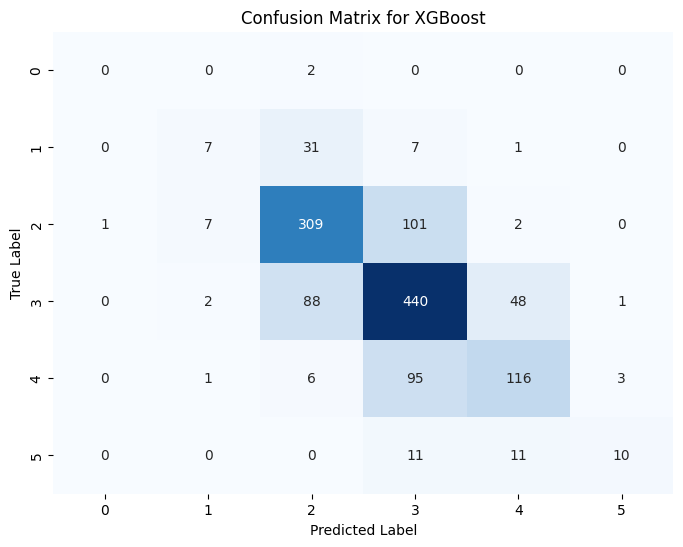

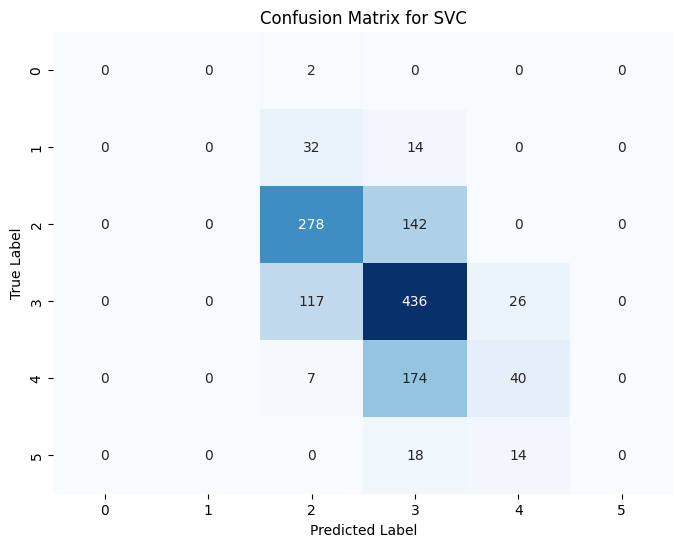

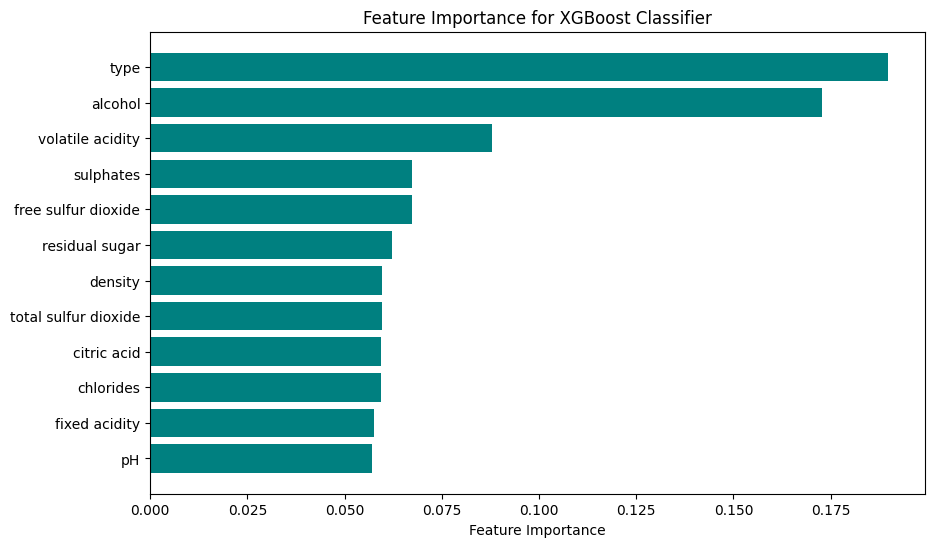

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Training and validation accuracy for each model
model_names = ["Logistic Regression", "XGBoost", "SVC"]
train_accuracies = [log_reg_train_acc, xgb_train_acc, svc_train_acc]
val_accuracies = [log_reg_val_acc, xgb_val_acc, svc_val_acc]

# Plotting training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='b')
plt.plot(model_names, val_accuracies, label='Validation Accuracy', marker='o', linestyle='--', color='r')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Each Model")
plt.legend()
plt.ylim([0, 1])  # Scale between 0 and 1 for accuracy
plt.show()

# Confusion matrix for each model
models = [log_reg, xgb_clf, svc]

for i, model in enumerate(models):
    # Generate predictions
    y_pred = model.predict(X_val)

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_names[i]}")
    plt.show()

# Feature Importance for XGBoost
if hasattr(xgb_clf, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importances = xgb_clf.feature_importances_
    feature_names = X.columns
    sorted_idx = feature_importances.argsort()

    plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color='teal')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance for XGBoost Classifier")
    plt.show()
